<a href="https://colab.research.google.com/github/likayajama/Project-1/blob/main/Employee_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading dataset
df = pd.read_csv('/content/Employee_Retention1.csv')

In [ ]:
# reading head & tail
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1.0,0.41,4,174,3,0,0,0,technical,low
1,1.0,0.74,3,220,4,0,0,0,technical,low
2,1.0,0.66,4,180,3,0,0,0,technical,low
3,1.0,0.81,5,178,2,0,0,0,technical,low
4,1.0,0.88,4,191,4,0,0,0,technical,low


In [ ]:
# find null values
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
# Displaying summary statistics
print(df.describe(include='all'))

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   


In [ ]:
# Checking for missing values
print("\nMissing values are:\n", df.isnull().sum())


Missing values are:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [ ]:
# Data types of each column
print( df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [ ]:
# Replacing 'med' with 'medium' in the 'salary' column
df['salary'] = df['salary'].replace({'med': 'medium'})

# Displaying unique values in the 'salary' column to verify the replacement
print(df['salary'].unique())


['low' 'medium' 'high']


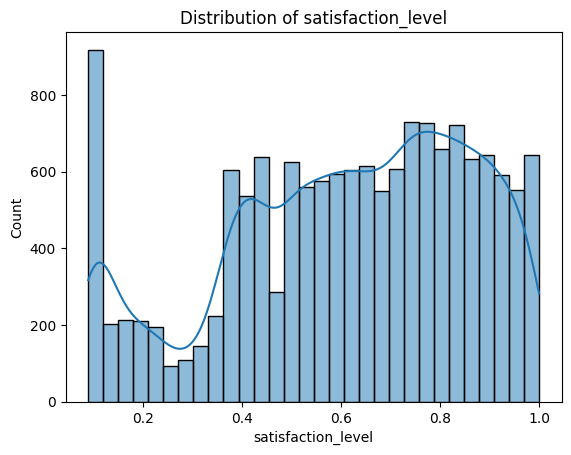

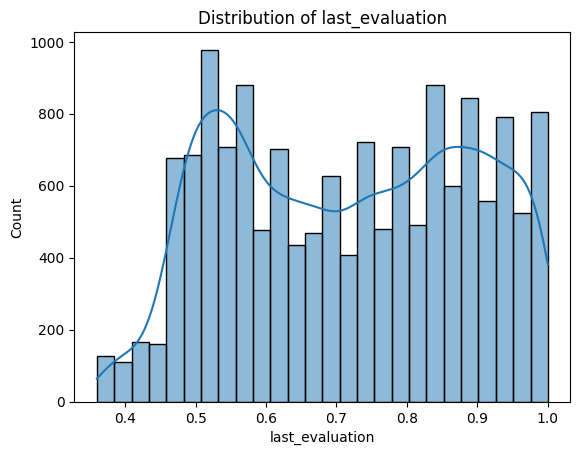

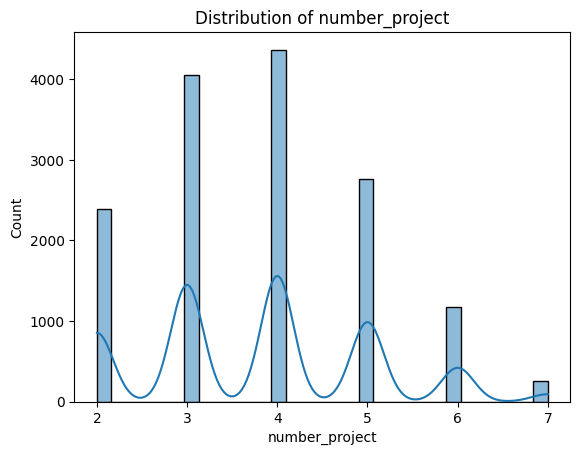

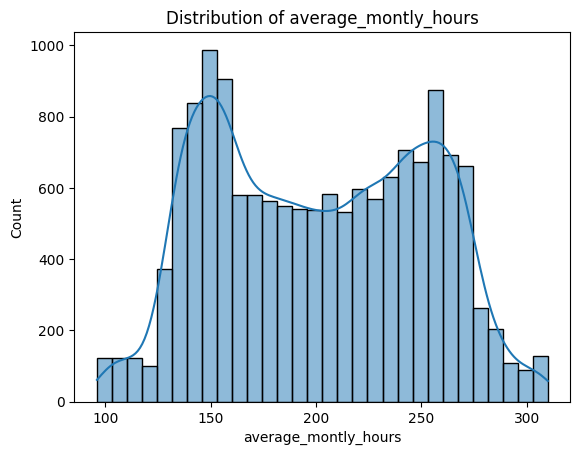

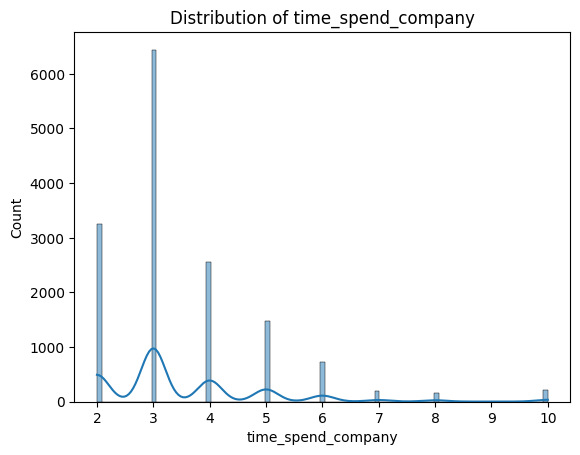

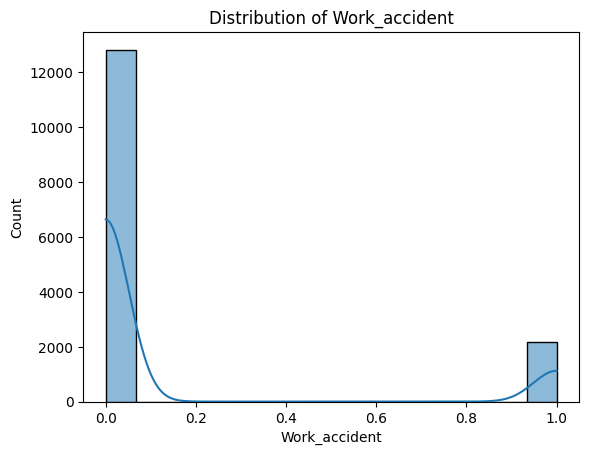

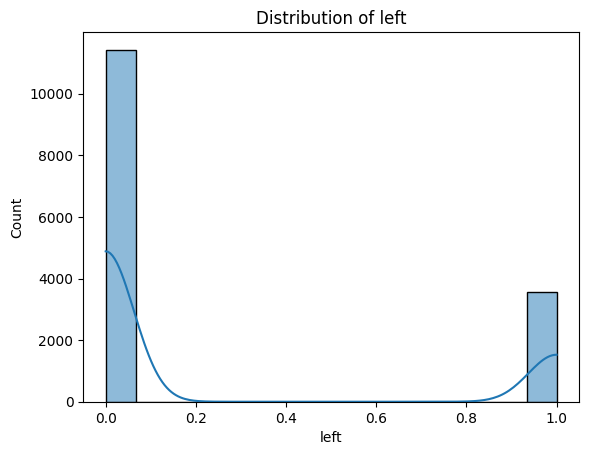

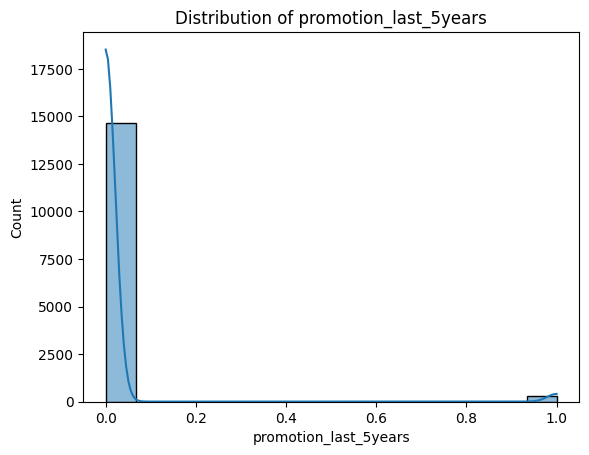

In [ ]:
# Visualizing distributions of numerical variables
for col in df.select_dtypes(include=np.number):
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

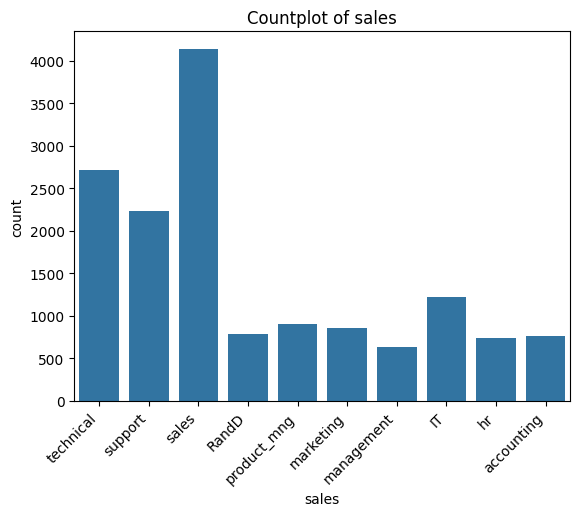

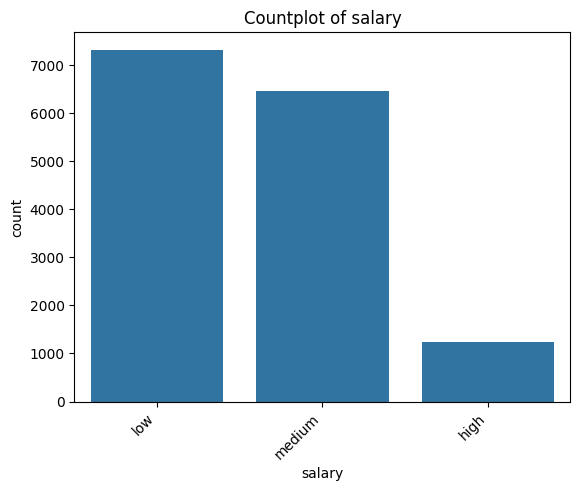

In [ ]:
# Visualizing categorical variables using count plots
for col in df.select_dtypes(exclude=np.number):
  plt.figure()
  sns.countplot(x=col, data=df)
  plt.title(f'Countplot of {col}')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
  plt.show()

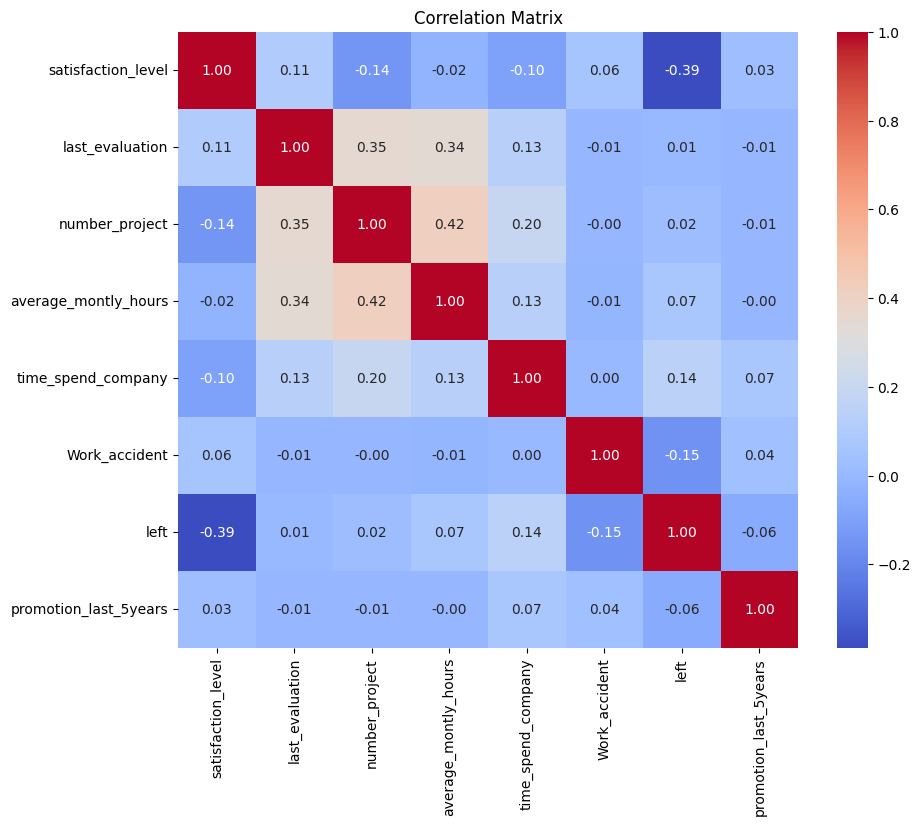

In [ ]:
# Correlation matrix for numerical variables (if applicable)
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns

if len(numerical_df.columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

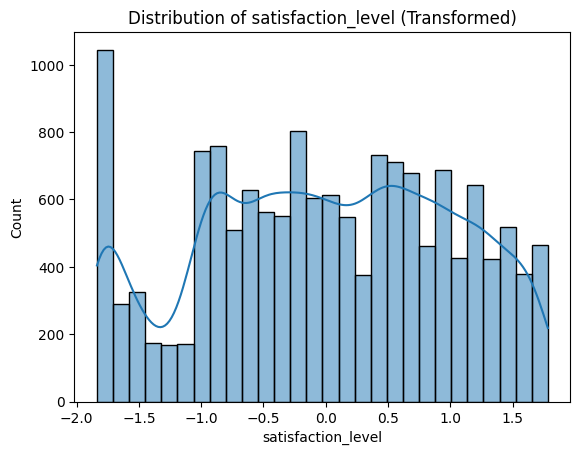

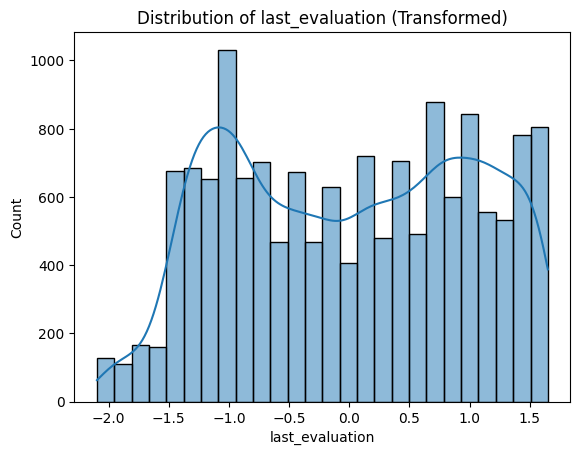

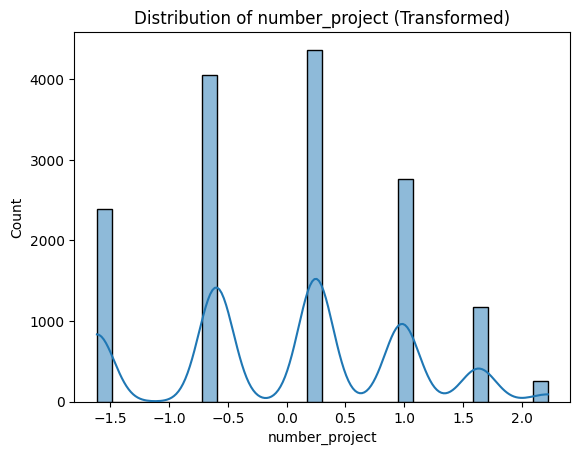

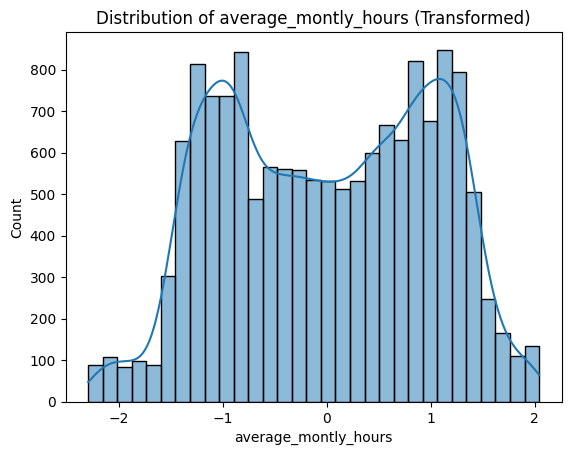

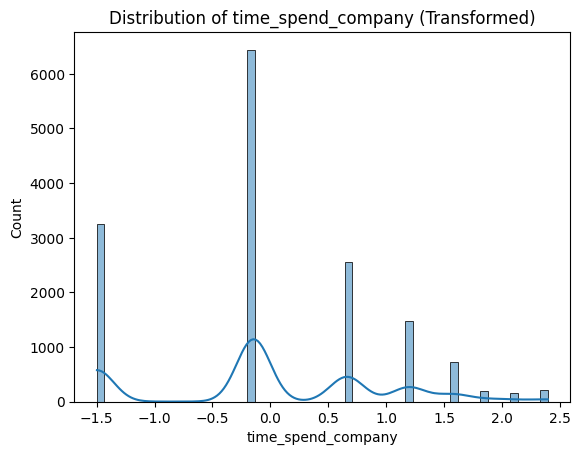

In [ ]:
# Initialize the PowerTransformer with Yeo-Johnson method (handles both positive and negative values)
pt = PowerTransformer(method='yeo-johnson')

# Select the continuous variables for transformation
continuous_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_montly_hours', 'time_spend_company']

# Fit and transform the selected columns
df[continuous_cols] = pt.fit_transform(df[continuous_cols])

# Now the 'continuous_cols' have been transformed
# You can visualize the transformed data to confirm the change in distributions

for col in continuous_cols:
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col} (Transformed)')
  plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'left' is your target variable
X = df.drop('left', axis=1)
y = df['left']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% validation

# Now you have X_train, X_val, y_train, and y_val
# X_train and y_train are your training data
# X_val and y_val are your validation data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (11999, 9)
Validation data shape: (3000, 9)


In [ ]:
# Convert categorical features to numerical using Label Encoding
label_encoders = {}
categorical_cols = ['sales', 'salary']  # Replace with your actual categorical column names

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])  # Use transform on the validation set
    label_encoders[col] = le

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the decision tree classifier
dt_model.fit(X_train, y_train)  # Fit the model on the training data
dt_predictions = dt_model.predict(X_val)  # Predict on the validation set

In [ ]:
# Evaluate Decision Tree Model
dt_accuracy = accuracy_score(y_val, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_val, dt_predictions))

Decision Tree Accuracy: 0.9783333333333334
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2266
           1       0.94      0.97      0.96       734

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Initialize logistic regression, increased max_iter
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_val)

In [ ]:
# Evaluate Logistic Regression Model
lr_accuracy = accuracy_score(y_val, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(classification_report(y_val, lr_predictions))

Logistic Regression Accuracy: 0.7726666666666666
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2266
           1       0.56      0.32      0.41       734

    accuracy                           0.77      3000
   macro avg       0.68      0.62      0.63      3000
weighted avg       0.75      0.77      0.75      3000

